# ניתוח מאמרים על COVID-19

באתגר הזה, נמשיך לעסוק בנושא מגפת הקורונה, ונמקד את תשומת הלב בעיבוד מאמרים מדעיים בנושא. קיים [מאגר הנתונים CORD-19](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) הכולל יותר מ-7000 (נכון לזמן הכתיבה) מאמרים על COVID, הזמינים עם מטא-נתונים ותקצירים (ובכמחצית מהמקרים גם הטקסט המלא זמין).

דוגמה מלאה לניתוח מאגר נתונים זה באמצעות שירות הקוגניציה [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) מתוארת [בפוסט בבלוג הזה](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/). אנו נדון בגרסה פשוטה יותר של ניתוח זה.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## קבלת הנתונים

ראשית, עלינו להשיג את המטא-נתונים של מאמרי CORD שאיתם נעבוד.

**NOTE**: איננו מספקים עותק של מערך הנתונים כחלק ממאגר זה. ייתכן שתצטרכו להוריד תחילה את הקובץ [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) ממערך הנתונים הזה ב-[Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge). ייתכן שתידרש הרשמה ל-Kaggle. ניתן גם להוריד את מערך הנתונים ללא הרשמה [מכאן](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html), אך הוא יכלול את כל הטקסטים המלאים בנוסף לקובץ המטא-נתונים.

ננסה להשיג את הנתונים ישירות ממקור מקוון, אך אם זה ייכשל, תצטרכו להוריד את הנתונים כפי שתואר לעיל. בנוסף, יש היגיון להוריד את הנתונים אם אתם מתכננים לערוך ניסויים נוספים, כדי לחסוך זמן המתנה.

> **NOTE** מערך הנתונים די גדול, בערך 1 ג'יגה-בייט בגודלו, והשורה הבאה בקוד עשויה לקחת זמן רב לסיום! (~5 דקות)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

כעת נהפוך את עמודת תאריך הפרסום ל-`datetime`, ונשרטט את ההיסטוגרמה כדי לראות את טווח תאריכי הפרסום.


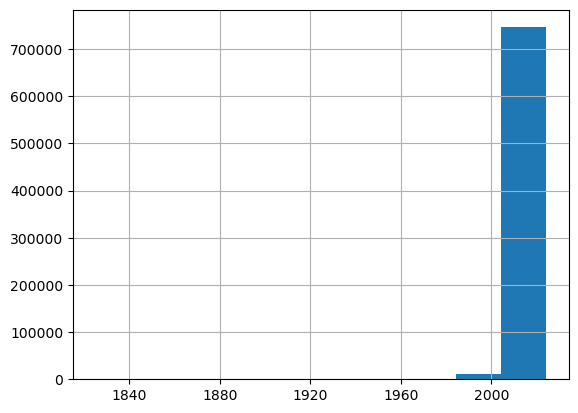

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## חילוץ נתונים מובנים

בואו נראה איזה סוג מידע ניתן לחלץ בקלות מתקצירים. דבר אחד שעשוי לעניין אותנו הוא לראות אילו אסטרטגיות טיפול קיימות, וכיצד הן התפתחו לאורך זמן. כדי להתחיל, נוכל להרכיב באופן ידני רשימה של תרופות אפשריות לטיפול בקורונה, וגם רשימה של אבחנות. לאחר מכן נעבור עליהן ונחפש מונחים תואמים בתקצירים של מאמרים.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


הוספנו מספר עמודות ל-DataFrame שלנו שמכילות את מספר הפעמים שמופיעה תרופה או אבחנה מסוימת בתקציר.

> **שימו לב** שאנחנו מוסיפים רווח לתחילת המילה כשאנחנו מחפשים תת-מחרוזת. אם לא נעשה זאת, עלולים לקבל תוצאות שגויות, כי *chloroquine* יימצא גם בתוך תת-מחרוזת *hydroxychloroquine*. בנוסף, אנחנו מכריחים המרה של עמודת התקצירים ל-`str` כדי להימנע משגיאה - נסו להסיר את `str` ותראו מה קורה.

כדי להקל על העבודה עם הנתונים, אפשר לחלץ תת-מסגרת שמכילה רק את ספירות התרופות, ולחשב את המספר המצטבר של ההופעות. זה נותן לנו את התרופה הפופולרית ביותר:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

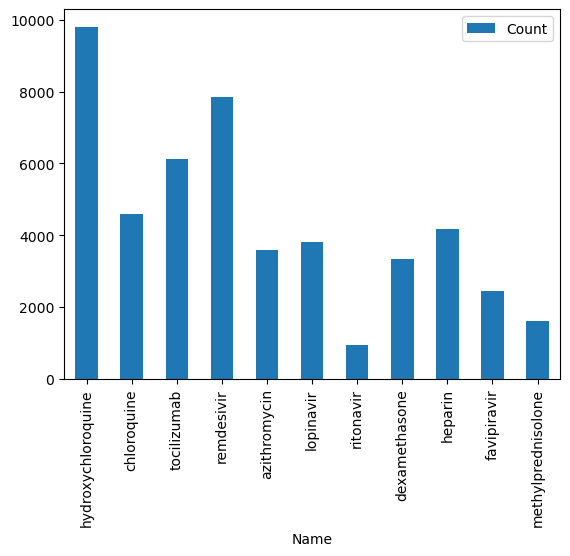

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## חיפוש מגמות באסטרטגיית טיפול

בדוגמה למעלה חישבנו את הסכום של כל הערכים, אבל אפשר גם לבצע את אותו הדבר על בסיס חודשי:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

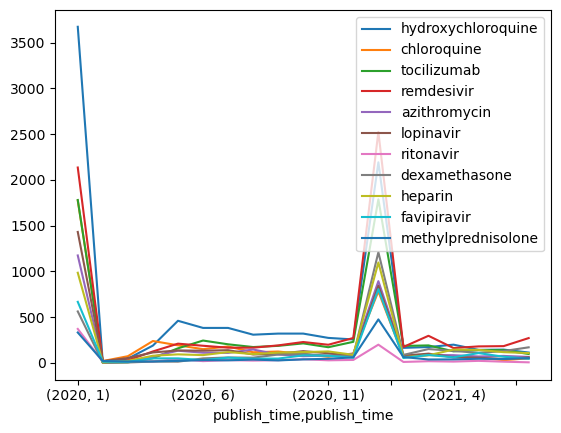

In [152]:
dfmt.plot()
plt.show()

מעניין לראות שיש לנו עליות חדות בשני מקומות: ינואר 2020 וינואר 2021. הדבר נובע מכך שחלק מהמאמרים אינם כוללים תאריך פרסום מוגדר בבירור, ולכן הם מסומנים כינואר של אותה שנה.

כדי להבין את הנתונים בצורה טובה יותר, בואו נמחיש רק כמה תרופות. בנוסף, "נמחק" את הנתונים של ינואר ונמלא אותם בערך ממוצע כלשהו, כדי ליצור גרף נעים יותר:


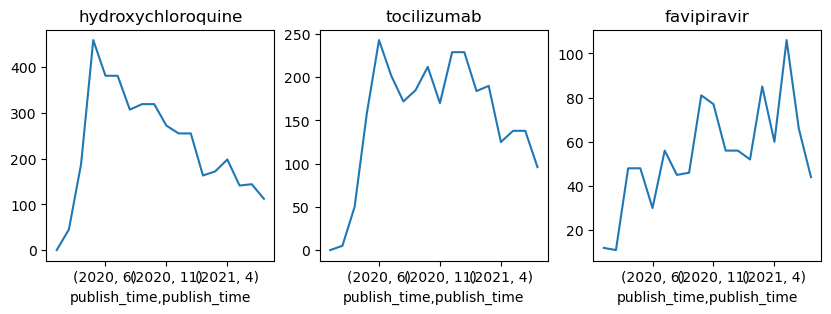

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

שימו לב כיצד הפופולריות של הידרוקסיכלורוקווין הייתה בעלייה בחודשים הראשונים, ואז החלה לרדת, בעוד שמספר האזכורים של פאביפיראוויר מראה עלייה יציבה. דרך טובה נוספת להמחיש פופולריות יחסית היא להשתמש ב**גרף ערימה** (או **גרף שטח** במונחי Pandas):


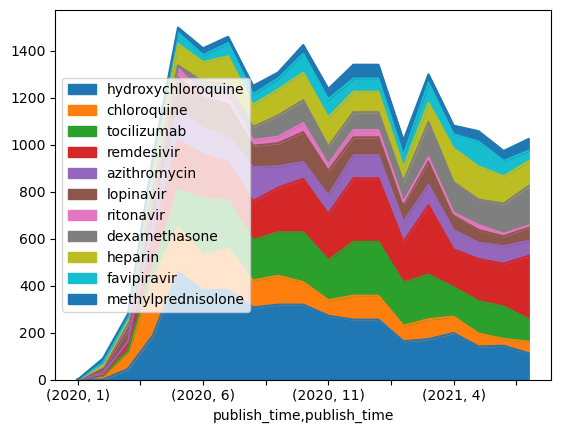

In [154]:
dfmt.plot.area()
plt.show()

יתר על כן, אנו יכולים לחשב פופולריות יחסית באחוזים:


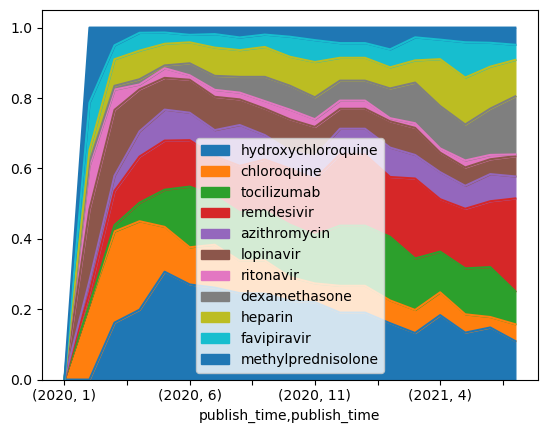

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## חישוב התאמה בין תרופות לאבחנות

אחת מהמערכות היחסים המעניינות ביותר שניתן לחקור היא כיצד אבחנות שונות מטופלות באמצעות תרופות שונות. כדי להמחיש זאת, עלינו לחשב **מפת תדירות הופעה משותפת**, שתראה כמה פעמים שני מונחים מוזכרים באותו מאמר.

מפה כזו היא למעשה מטריצה דו-ממדית, שהייצוג הטוב ביותר שלה הוא באמצעות **numpy array**. נחשב את המפה הזו על ידי מעבר על כל התקצירים וסימון היישויות שמופיעות בהם:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

אחת הדרכים להמחיש מטריצה זו היא לצייר **מפת חום**:


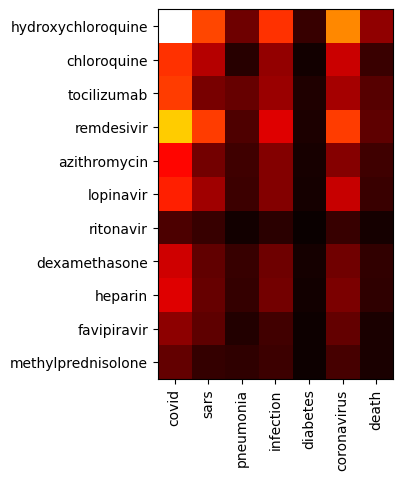

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

עם זאת, ניתן לבצע ויזואליזציה טובה יותר באמצעות דיאגרמת **Sankey**! ל-`matplotlib` אין תמיכה מובנית בסוג דיאגרמה זה, ולכן נצטרך להשתמש ב-[Plotly](https://plotly.com/python/) כפי שמתואר [במדריך הזה](https://plotly.com/python/sankey-diagram/).

כדי ליצור דיאגרמת Sankey באמצעות Plotly, עלינו לבנות את הרשימות הבאות:
* רשימה `all_nodes` של כל הצמתים בגרף, שתכלול גם תרופות וגם אבחנות
* רשימת אינדקסים של מקור ויעד - רשימות אלו יציגו אילו צמתים עוברים לצד שמאל ואילו לצד ימין של הדיאגרמה
* רשימת כל הקישורים, כאשר כל קישור מורכב מ:
   - אינדקס מקור במערך `all_nodes`
   - אינדקס יעד
   - ערך שמצביע על עוצמת הקישור. זהו בדיוק הערך מתוך מטריצת ההתרחשות המשותפת שלנו.
   - צבע הקישור, אופציונלי. נוסיף אפשרות להדגיש כמה מהמונחים לצורך בהירות.

הקוד הכללי ליצירת דיאגרמת Sankey מובנה כפונקציה נפרדת בשם `sankey`, אשר מקבלת שתי רשימות (קטגוריות מקור ויעד) ומטריצת ההתרחשות המשותפת. היא גם מאפשרת לנו להגדיר סף, ולסנן את כל הקישורים שהם חלשים יותר מהסף הזה - מה שהופך את הדיאגרמה לפחות מורכבת.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## סיכום

ראיתם שניתן להשתמש בשיטות פשוטות יחסית כדי לחלץ מידע ממקורות נתונים לא מובנים, כמו טקסט. בדוגמה זו, השתמשנו ברשימה קיימת של תרופות, אך יהיה הרבה יותר עוצמתי להשתמש בטכניקות עיבוד שפה טבעית (NLP) כדי לבצע חילוץ ישויות מטקסט. בפוסט [הבלוג הזה](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) אנו מתארים כיצד להשתמש בשירותי ענן לחילוץ ישויות. אפשרות נוספת תהיה שימוש בספריות NLP של Python כמו [NLTK](https://www.nltk.org/) - גישה לחילוץ מידע מטקסט באמצעות NLTK מתוארת [כאן](https://www.nltk.org/book/ch07.html).


## אתגר

המשיכו לחקור את נתוני המאמרים על COVID לאורך הקווים הבאים:

1. בנו מטריצת חפיפה של תרופות שונות, ובדקו אילו תרופות מופיעות לעיתים קרובות יחד (כלומר, מוזכרות באותו תקציר). ניתן לשנות את הקוד לבניית מטריצת חפיפה עבור תרופות ואבחנות.
1. הציגו את המטריצה הזו באמצעות מפת חום.
1. כיעד מאתגר, תוכלו לנסות להציג את החפיפה של תרופות באמצעות [דיאגרמת מיתר](https://en.wikipedia.org/wiki/Chord_diagram). [הספרייה הזו](https://pypi.org/project/chord/) עשויה לעזור לכם לצייר דיאגרמת מיתר.
1. כיעד מאתגר נוסף, נסו לחלץ מינונים של תרופות שונות (כמו **400mg** במשפט *take 400mg of chloroquine daily*) באמצעות ביטויים רגולריים, ובנו DataFrame שמציג מינונים שונים עבור תרופות שונות. **שימו לב**: קחו בחשבון ערכים מספריים שנמצאים בסמיכות טקסטואלית לשם התרופה.



---

**כתב ויתור**:  
מסמך זה תורגם באמצעות שירות תרגום מבוסס בינה מלאכותית [Co-op Translator](https://github.com/Azure/co-op-translator). למרות שאנו שואפים לדיוק, יש לקחת בחשבון שתרגומים אוטומטיים עשויים להכיל שגיאות או אי דיוקים. המסמך המקורי בשפתו המקורית צריך להיחשב כמקור סמכותי. עבור מידע קריטי, מומלץ להשתמש בתרגום מקצועי על ידי אדם. איננו נושאים באחריות לאי הבנות או לפרשנויות שגויות הנובעות משימוש בתרגום זה.
